In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [426]:
df = pd.read_csv(r"C:\Users\isham\OneDrive\Desktop\LeadsData.csv")
df

,User ID,Assigned_Date,Attempted_Date,Lead Owner,Grade,Main_Stage,Sub_Stage,Super_Sub_Stage,First call attempt TAT,First Call Connect_TAT,Team Leader,Demo_Booked,Demo_Done,State,Talk_Time,Agent Tenurity (in Months),Revenue
0,a037c322-31fe-4a2a-adf,10-04-2025,11-04-2025,reea037c322@dummy.com,Class 10,Lead Connected,Not Interested,Already Enrolled Elsewhere,834,834,Kis0e4725,No,No,Delhi,90,6,0
1,36c0a89b-32b8-423e-adb,07-04-2025,08-04-2025,sha36c0a89b@dummy.com,Class 10,Non Contact,No Response,Repeated DNP,1307,2843,Ansff2506,No,No,Delhi,1,3,0
2,f2700819-15fd-413f-a7a,21-03-2025,23-03-2025,mohf2700819@dummy.com,Class 10,Lead Connected,Not Interested,Already Enrolled Elsewhere,3482,3482,S Tfb8a98,No,No,Delhi,74,0,0
3,369e7e80-7fd6-4b14-934,16-04-2025,16-04-2025,v.k369e7e80@dummy.com,Class 10,Non Contact,DNP,Repeated DNP,111,0,Sak519e42,No,No,Delhi,0,4,0
4,08308271-5b82-4f41-bb8,01-03-2025,05-03-2025,ish08308271@dummy.com,Class 10,Non Contact,No Response,Repeated DNP,6157,0,Abuf0c333,No,No,Telangana,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,d0577de4-16a6-4c68-bee,22-02-2025,22-02-2025,ash7cdba69d@dummy.com,Class 5,Lead Connected,No Response,Repeated DNP,567,3500,Abuf0c333,No,No,Delhi,44,1,0
16379,c94bf5e5-f25c-43f5-842,22-03-2025,22-03-2025,kal3054a889@dummy.com,Class 5,Non Contact,No Response,Repeated DNP,46,0,Ansff2506,No,No,Tamil Nadu,0,4,0
16380,76396e8d-8c8d-497e-ac5,13-04-2025,13-04-2025,rajc55e7e1c@dummy.com,Class 5,Non Contact,No Response,Repeated DNP,352,0,Kis0e4725,No,No,Andhra Pradesh,0,0,0
16381,858d645e-783c-46e5-b75,19-04-2025,19-04-2025,aks18ee9e11@dummy.com,Class 5,Non Contact,DNP,Repeated DNP,332,0,Kis0e4725,No,No,Delhi,0,0,0


In [427]:
df.isnull().sum()

User ID                       0
Assigned_Date                 0
Attempted_Date                0
Lead Owner                    0
Grade                         0
Main_Stage                    0
Sub_Stage                     0
Super_Sub_Stage               0
First call attempt TAT        0
First Call Connect_TAT        0
Team Leader                   0
Demo_Booked                   0
Demo_Done                     0
State                         0
Talk_Time                     0
Agent Tenurity (in Months)    0
Revenue                       0
dtype: int64

In [428]:
#Segmentation
non_rev_df = df[df['Revenue'] == 0]
rev_df = df[df['Revenue'] != 0]

In [1]:
non_rev_df['Assigned_Date'] = pd.to_datetime(non_rev_df['Assigned_Date'], format='%d-%m-%Y')
non_rev_df['Attempted_Date'] = pd.to_datetime(non_rev_df['Attempted_Date'], format='%d-%m-%Y')

rev_df['Assigned_Date'] = pd.to_datetime(rev_df['Assigned_Date'], format='%d-%m-%Y')
rev_df['Attempted_Date'] = pd.to_datetime(rev_df['Attempted_Date'], format='%d-%m-%Y')

In [430]:
df.columns

Index(['User ID', 'Assigned_Date', 'Attempted_Date', 'Lead Owner', 'Grade',
       'Main_Stage', 'Sub_Stage', 'Super_Sub_Stage', 'First call attempt TAT',
       'First Call Connect_TAT', 'Team Leader', 'Demo_Booked', 'Demo_Done',
       'State', 'Talk_Time', 'Agent Tenurity (in Months)', 'Revenue'],
      dtype='object')

# Important KPIs

In [433]:
# Generic KPIs

print(f"Total Revenue : {df['Revenue'].sum()}")
print(f"Total Leads Assigned : {df['User ID'].nunique()}")
print(f"Total Attempted Leads : {df[df['Attempted_Date'] != '01-01-1900']['User ID'].nunique()}")
print(f"First Call Attempt Rate : {round(df[df['Attempted_Date'] != '01-01-1900']['User ID'].nunique() / df['User ID'].nunique() * 100)}%")

main_stage_connects = df[df['Main_Stage'].isin(['Lead Connected','Non Contact', 'Waiting for confirmation',
       'Enrollment Done', 'Demo Booked', 'Demo Done',
       'Promised to pay', 'Deferred Hot'])].shape[0]
print(f"Connected Leads in Main Stage : {main_stage_connects}")
print(f"Connected Leads in Sub Stage : {df[df['Sub_Stage'] != 'Fresh Signup']['User ID'].nunique()}")
print(f"Connected Leads in Super Sub Stage : {df[df['Super_Sub_Stage'] != 'Fresh Signup']['User ID'].nunique()}")

print(f"Leads Not Contacted yet : {round((df['User ID'].nunique() - main_stage_connects) / df['User ID'].nunique() *100, 1)}%")
# Total Call Attempt Rate is close to 95%, which means councellors are maintaining high call ratio

print(f"Demo Booked Rate : {round(df[df['Demo_Booked'] == 'Yes']['User ID'].nunique() / df['User ID'].nunique() * 100)}%")
print(f"Demo Done Rate : {round(df[df['Demo_Done'] == 'Yes']['User ID'].nunique() / df['User ID'].nunique() * 100)}%")

# There is only 50% leads who are actually completing the demo after booking, rest 50% are just taken the demo but not completed. There is a visible gap

print(f"Revenue Conversion Rate : {round(df[df['Revenue'] > 0]['User ID'].nunique() / df['User ID'].nunique() * 100, 1)}%")

print(f"Average First Call Attempt TAT: {round(df['First call attempt TAT'].mean())} min ~ 26 Hours ~ 1 Day")
print(f"Average First Call Connect TAT: {round(df['First Call Connect_TAT'].mean())} min ~ 61 Hours ~ 2.5 Day")

print(f"Average Talk Time: {round(df['Talk_Time'].mean())} min ~ 1.3 Hours")

Total Revenue : 4493556
Total Leads Assigned : 16383
Total Attempted Leads : 15470
First Call Attempt Rate : 94%
Connected Leads in Main Stage : 15585
Connected Leads in Sub Stage : 15585
Connected Leads in Super Sub Stage : 15585
Leads Not Contacted yet : 4.9%
Demo Booked Rate : 8%
Demo Done Rate : 4%
Revenue Conversion Rate : 0.8%
Average First Call Attempt TAT: 1557 min ~ 26 Hours ~ 1 Day
Average First Call Connect TAT: 3672 min ~ 61 Hours ~ 2.5 Day
Average Talk Time: 91 min ~ 1.3 Hours


# Agent Performance 

In [434]:
leads_per_agent = df.groupby('Lead Owner')['User ID'].nunique().reset_index(name='Total_Leads').sort_values(by='Total_Leads', ascending=False)
print(f"Average Leads Assigned per Lead Owner : {round(leads_per_agent['Total_Leads'].mean())}")

df_grouped = df.groupby('Lead Owner')['Revenue'].sum().reset_index(name='Total_Revenue')
df_grouped['Percentage'] = (df_grouped['Total_Revenue'] / df_grouped['Total_Revenue'].sum()) * 100
df_grouped = df_grouped.sort_values(by='Total_Revenue', ascending=False)
df_grouped.head(5)

Average Leads Assigned per Lead Owner : 190


,Lead Owner,Total_Revenue,Percentage
28,kav59786d19@dummy.com,578000,12.862864
73,sona1c61f4f@dummy.com,508500,11.316205
80,v.k369e7e80@dummy.com,328000,7.299342
57,roha6f6de35@dummy.com,228000,5.073933
72,son2c9ed2db@dummy.com,222000,4.940408


In [ ]:
# Top 5 Agent generating higher Revenue

In [435]:
df_grouped = df.groupby('Lead Owner')['Revenue'].sum().reset_index(name='Total_Revenue')
df_grouped['Percentage'] = (df_grouped['Total_Revenue'] / df_grouped['Total_Revenue'].sum()) * 100
df_grouped = df_grouped.sort_values(by='Total_Revenue', ascending=False)
df_grouped.head(5)

,Lead Owner,Total_Revenue,Percentage
28,kav59786d19@dummy.com,578000,12.862864
73,sona1c61f4f@dummy.com,508500,11.316205
80,v.k369e7e80@dummy.com,328000,7.299342
57,roha6f6de35@dummy.com,228000,5.073933
72,son2c9ed2db@dummy.com,222000,4.940408


In [436]:
df_grouped = df.groupby('Lead Owner')['Revenue'].sum().reset_index(name='Total_Revenue')

print(f"Pct of Lead Owner generating revenue: {round(df_grouped[df_grouped['Total_Revenue'] > 0]['Lead Owner'].count() / df_grouped['Lead Owner'].count()*100)}%")

Pct of Lead Owner generating revenue: 60%


In [438]:
# Lead Owner who are generating reveue

print(f"Average Talk Time by revenue generating Lead Owners : {round(rev_df['Talk_Time'].mean())} min ~ 6 Hours")
print(f"Average Talk Time by non revenue generating Lead Owners : {round(non_rev_df['Talk_Time'].mean())} min ~ 1.28 Hour")

Average Talk Time by revenue generating Lead Owners : 365 min ~ 6 Hours
Average Talk Time by non revenue generating Lead Owners : 88 min ~ 1.28 Hour


In [192]:
df.columns

Index(['User ID', 'Assigned_Date', 'Attempted_Date', 'Lead Owner', 'Grade',
       'Main_Stage', 'Sub_Stage', 'Super_Sub_Stage', 'First call attempt TAT',
       'First Call Connect_TAT', 'Team Leader', 'Demo_Booked', 'Demo_Done',
       'State', 'Talk_Time', 'Agent Tenurity (in Months)', 'Revenue'],
      dtype='object')

In [440]:
# Average First Call Attempt TAT

print(f"Average First Call Attempt TAT by revenue generating agents: {round(rev_df['First call attempt TAT'].mean())} min ~ 13 Hours")
print(f"Average First Call Attempt TAT by non-revenue generating agents: {round(non_rev_df['First call attempt TAT'].mean())} min ~ 26 hours")
print()
print(f"Average First Call Connect TAT by revenue generating agents: {round(rev_df['First Call Connect_TAT'].mean())} min ~ 26 Hours")
print(f"Average First Call Connect TAT by non-revenue generating agents: {round(non_rev_df['First Call Connect_TAT'].mean())} min ~ 67 hours")

Average First Call Attempt TAT by revenue generating agents: 826 min ~ 13 Hours
Average First Call Attempt TAT by non-revenue generating agents: 1563 min ~ 26 hours

Average First Call Connect TAT by revenue generating agents: 1586 min ~ 26 Hours
Average First Call Connect TAT by non-revenue generating agents: 3689 min ~ 67 hours


In [338]:
# Effect of Agent Tenurity on Conversion/Revenue

rev_df.groupby('Lead Owner')['Agent Tenurity (in Months)'].mean().reset_index(name='Avg_Tenurity')

,Lead Owner,Avg_Tenurity
0,aase88faf35@dummy.com,6.0
1,aks5e0e6bdc@dummy.com,6.0
2,ank5af5d47e@dummy.com,0.0
3,ansba8b6d5a@dummy.com,6.0
4,anua4ac688b@dummy.com,0.0
5,arc2c28657d@dummy.com,4.0
6,arua5959825@dummy.com,6.0
7,asfd9930e34@dummy.com,2.0
8,ash7cdba69d@dummy.com,1.0
9,ayae682f2fc@dummy.com,3.0


In [222]:
# Effect of Agent Tenurity on Conversion/Revenue

dd = df[['Agent Tenurity (in Months)', 'Revenue']]

In [225]:
dd.groupby('Agent Tenurity (in Months)')['Revenue'].sum().reset_index(name='Total_Revenue').sort_values(by='Total_Revenue', ascending=False)

,Agent Tenurity (in Months),Total_Revenue
6,6,2052400
4,4,655528
2,2,529500
3,3,464180
1,1,419000
0,0,372948
5,5,0


In [227]:
df['Agent Tenurity (in Months)'].value_counts()

Agent Tenurity (in Months)
0    4765
6    3554
3    2870
2    2088
4    1428
1    1215
5     463
Name: count, dtype: int64

In [234]:
d1 = rev_df[['Agent Tenurity (in Months)', 'Revenue']]
d1.groupby('Agent Tenurity (in Months)')['Revenue'].sum().reset_index(name='Total_Revenue').sort_values(by='Total_Revenue', ascending=False)

,Agent Tenurity (in Months),Total_Revenue
5,6,2052400
4,4,655528
2,2,529500
3,3,464180
1,1,419000
0,0,372948


In [241]:
rev_df.groupby('Agent Tenurity (in Months)')['User ID'].count().reset_index(name='Counts').sort_values(by='Counts', ascending=False)

,Agent Tenurity (in Months),Counts
5,6,62
4,4,17
2,2,16
0,0,14
3,3,14
1,1,11


In [240]:
non_rev_df.groupby('Agent Tenurity (in Months)')['User ID'].count().reset_index(name='Counts').sort_values(by='Counts', ascending=False)

,Agent Tenurity (in Months),Counts
0,0,4751
6,6,3492
3,3,2856
2,2,2072
4,4,1411
1,1,1204
5,5,463


In [246]:
rev_df.columns

Index(['User ID', 'Assigned_Date', 'Attempted_Date', 'Lead Owner', 'Grade',
       'Main_Stage', 'Sub_Stage', 'Super_Sub_Stage', 'First call attempt TAT',
       'First Call Connect_TAT', 'Team Leader', 'Demo_Booked', 'Demo_Done',
       'State', 'Talk_Time', 'Agent Tenurity (in Months)', 'Revenue'],
      dtype='object')

In [264]:
# What is the demo booking rate of revenue generating agents and non revenue generating agents ?

print(f"Demo Booking Rate of Revenue Generating Lead Owners : {round(rev_df[rev_df['Demo_Booked'] == 'Yes']['User ID'].nunique() / rev_df['User ID'].nunique() * 100)}%")
print(f"Demo Booking Rate of Non-Revenue Generating Lead Owners : {round(non_rev_df[non_rev_df['Demo_Booked'] == 'Yes']['User ID'].nunique() / non_rev_df['User ID'].nunique() * 100)}%")

Demo Booking Rate of Revenue Generating Lead Owners : 40%
Demo Booking Rate of Non-Revenue Generating Lead Owners : 8%


In [265]:
# What is the demo booking rate of revenue generating agents and non revenue generating agents ?

print(f"Demo Completion Rate of Revenue Generating Lead Owners : {round(rev_df[rev_df['Demo_Done'] == 'Yes']['User ID'].nunique() / rev_df['User ID'].nunique() * 100)}%")
print(f"Demo Completion Rate of Non-Revenue Generating Lead Owners : {round(non_rev_df[non_rev_df['Demo_Done'] == 'Yes']['User ID'].nunique() / non_rev_df['User ID'].nunique() * 100)}%")

Demo Completion Rate of Revenue Generating Lead Owners : 35%
Demo Completion Rate of Non-Revenue Generating Lead Owners : 4%


In [267]:
rev_df.groupby(['Lead Owner', 'State'])['Revenue'].sum().reset_index(name='Total_Revenue')

,Lead Owner,State,Total_Revenue
0,aase88faf35@dummy.com,Delhi,42000
1,aks5e0e6bdc@dummy.com,Delhi,160000
2,aks5e0e6bdc@dummy.com,Madhya Pradesh,28000
3,ank5af5d47e@dummy.com,Himachal Pradesh,13999
4,ansba8b6d5a@dummy.com,Telangana,26600
...,...,...,...
84,v.k369e7e80@dummy.com,Delhi,173500
85,v.k369e7e80@dummy.com,Haryana,45000
86,v.k369e7e80@dummy.com,Madhya Pradesh,35500
87,v.k369e7e80@dummy.com,Telangana,74000


In [286]:
grouped_rev_df= rev_df.groupby(['Lead Owner', 'State'])['Revenue'].sum().reset_index(name='Total_Revenue')
grouped_rev_df['ranks'] = grouped_rev_df.groupby('Lead Owner')['Total_Revenue'].rank(method='first', ascending=False)
d3 = grouped_rev_df[grouped_rev_df['ranks'] == 1.0]
d3.groupby('State')['Lead Owner'].count().reset_index(name='Total Agents').sort_values(by='Total Agents', ascending=False).head(5)

,State,Total Agents
3,Delhi,18
4,Himachal Pradesh,7
11,Tamil Nadu,5
7,Madhya Pradesh,4
12,Telangana,3


In [289]:
rev_df.groupby('State')['Revenue'].sum().reset_index(name='Total_Revenue_Per_State').sort_values(by='Total_Revenue_Per_State', ascending=False)

,State,Total_Revenue_Per_State
3,Delhi,1582400
5,Himachal Pradesh,554999
8,Madhya Pradesh,528500
15,Telangana,322300
14,Tamil Nadu,316779
16,Tripura,125950
12,Punjab,111800
6,Jharkhand,111500
11,Pondicherry,109700
7,Karnataka,106028


In [290]:
rev_df.groupby('Grade')['Revenue'].sum().reset_index(name='Total_Revenue_Per_Grade').sort_values(by='Total_Revenue_Per_Grade', ascending=False)

,Grade,Total_Revenue_Per_Grade
0,Class 10,2928876
1,Class 3,711580
2,Class 4,562500
3,Class 5,290600


In [292]:
rev_df.groupby(['Lead Owner','State', 'Grade'])['Revenue'].sum()

Lead Owner             State           Grade   
aase88faf35@dummy.com  Delhi           Class 10     42000
aks5e0e6bdc@dummy.com  Delhi           Class 10    103000
                                       Class 3      30000
                                       Class 4      27000
                       Madhya Pradesh  Class 10     28000
                                                    ...  
v.k369e7e80@dummy.com  Haryana         Class 4      45000
                       Madhya Pradesh  Class 10     35500
                       Telangana       Class 10     50000
                                       Class 3      24000
venf8beec5a@dummy.com  Tamil Nadu      Class 10     37500
Name: Revenue, Length: 107, dtype: int64

In [293]:
d4 = rev_df[['Lead Owner', 'State', 'Grade', 'Revenue']]
d4

,Lead Owner,State,Grade,Revenue
68,kav59786d19@dummy.com,Delhi,Class 10,38000
69,tar01030e73@dummy.com,Delhi,Class 10,38000
475,ramc0123d84@dummy.com,Tripura,Class 10,30000
691,cho64d5d4a1@dummy.com,Punjab,Class 10,30000
2557,v.k369e7e80@dummy.com,Madhya Pradesh,Class 10,35500
...,...,...,...,...
15484,son2c9ed2db@dummy.com,Tripura,Class 5,28000
15491,mon167dc69c@dummy.com,Madhya Pradesh,Class 5,27000
15492,asfd9930e34@dummy.com,Uttar Pradesh,Class 5,82600
15498,sha833388a6@dummy.com,Telangana,Class 5,25000


In [297]:
#Study RG Agents - Main Stage Data

rev_df[['User ID', 'Main_Stage']]

,User ID,Main_Stage
68,2b7f82a0-abf3-4cf1-ab4,Enrollment Done
69,a5959825-9348-42d2-9fb,Lead Connected
475,4bef22ac-d026-4ad9-805,Demo Done
691,5bdf5caf-c0aa-45a8-8e2,Assigned
2557,ebcf733e-f3f0-460e-9cb,Lead Connected
...,...,...
15484,00c8e923-f7ad-400c-aca,Enrollment Done
15491,9387e00f-87a8-4061-9bb,Enrollment Done
15492,93e2817a-95f0-4c09-959,Enrollment Done
15498,b215ee62-ae5a-4450-a9f,Enrollment Done


<Axes: xlabel='Main_Stage', ylabel='count'>

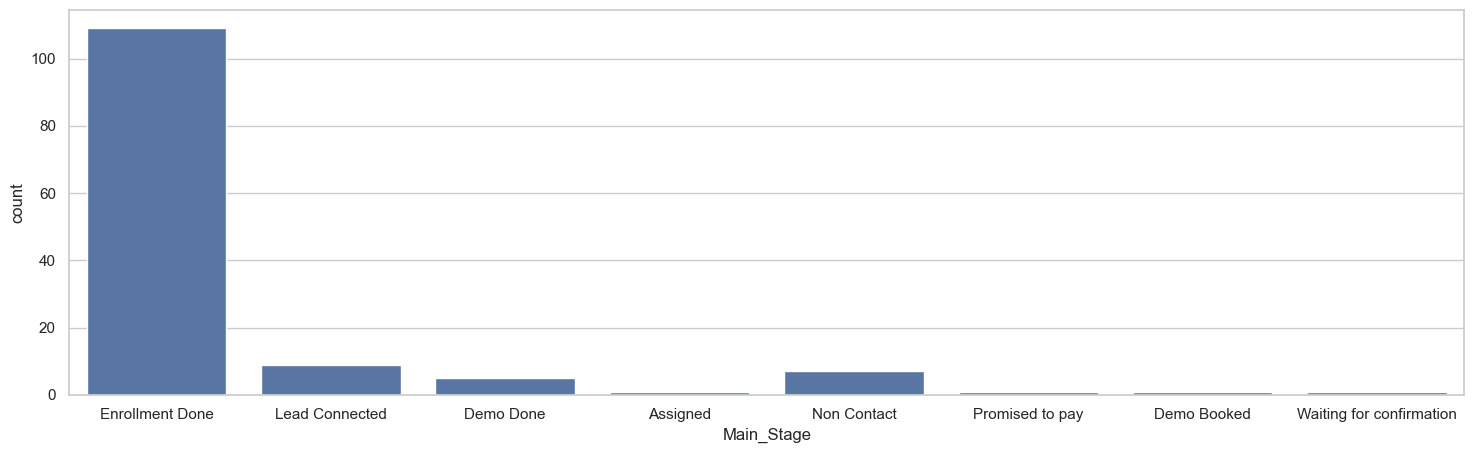

In [304]:
plt.figure(figsize=(18, 5))
sns.countplot(data=rev_df, x='Main_Stage')

<Axes: xlabel='Sub_Stage', ylabel='count'>

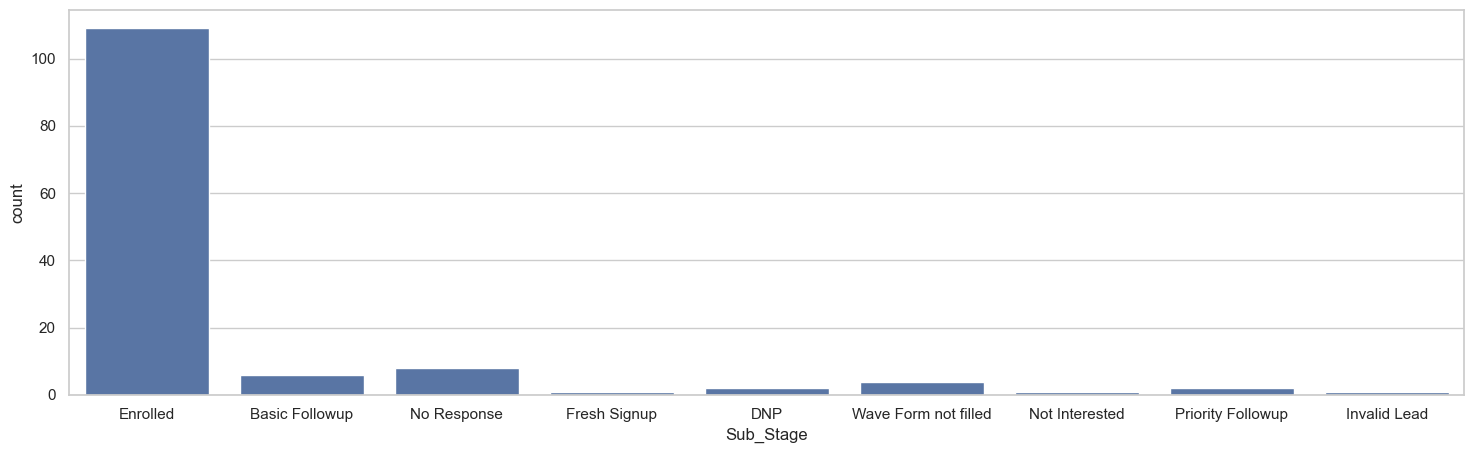

In [305]:
plt.figure(figsize=(18, 5))
sns.countplot(data=rev_df, x='Sub_Stage')

<Axes: xlabel='Super_Sub_Stage', ylabel='count'>

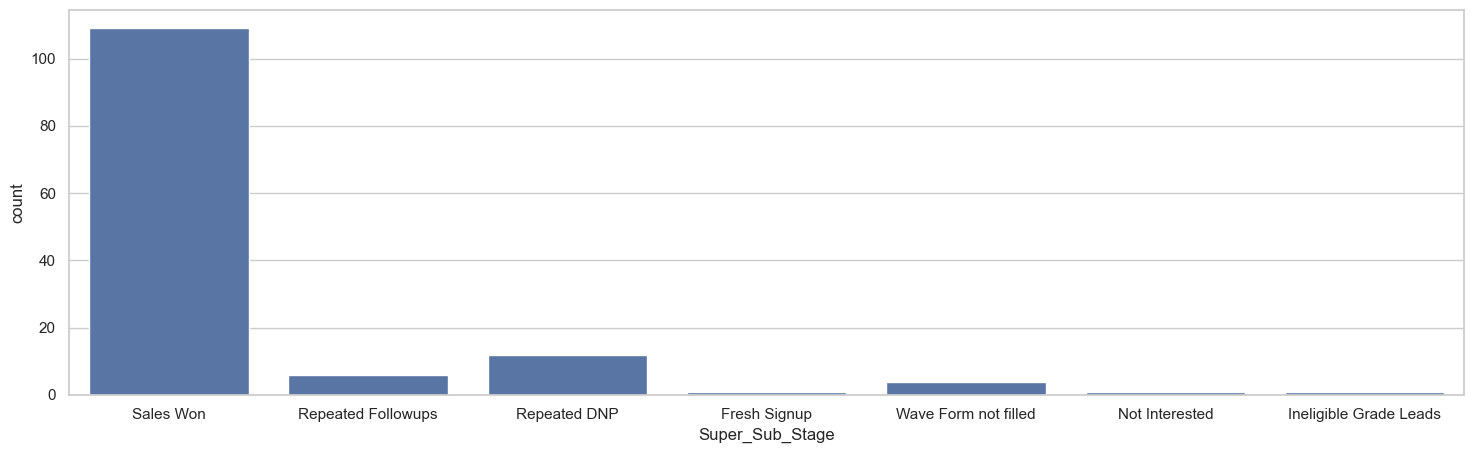

In [306]:
plt.figure(figsize=(18, 5))
sns.countplot(data=rev_df, x='Super_Sub_Stage')

In [ ]:
# In RG Agents Cohort : Enrollment is being done at the first point of contact itself

<Axes: xlabel='Main_Stage', ylabel='count'>

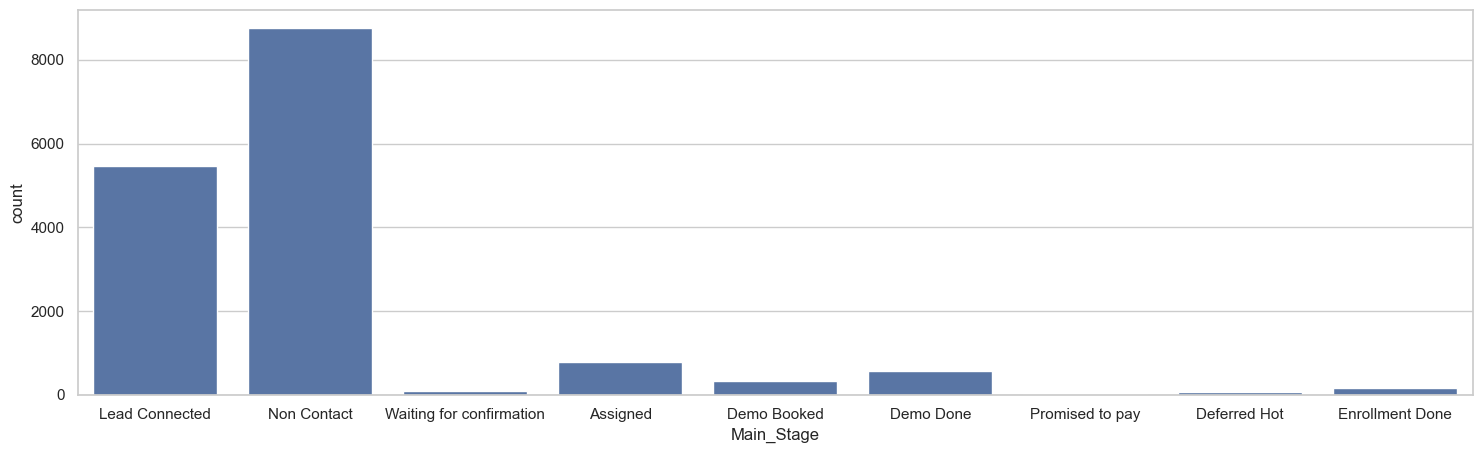

In [307]:
plt.figure(figsize=(18, 5))
sns.countplot(data=non_rev_df, x='Main_Stage')

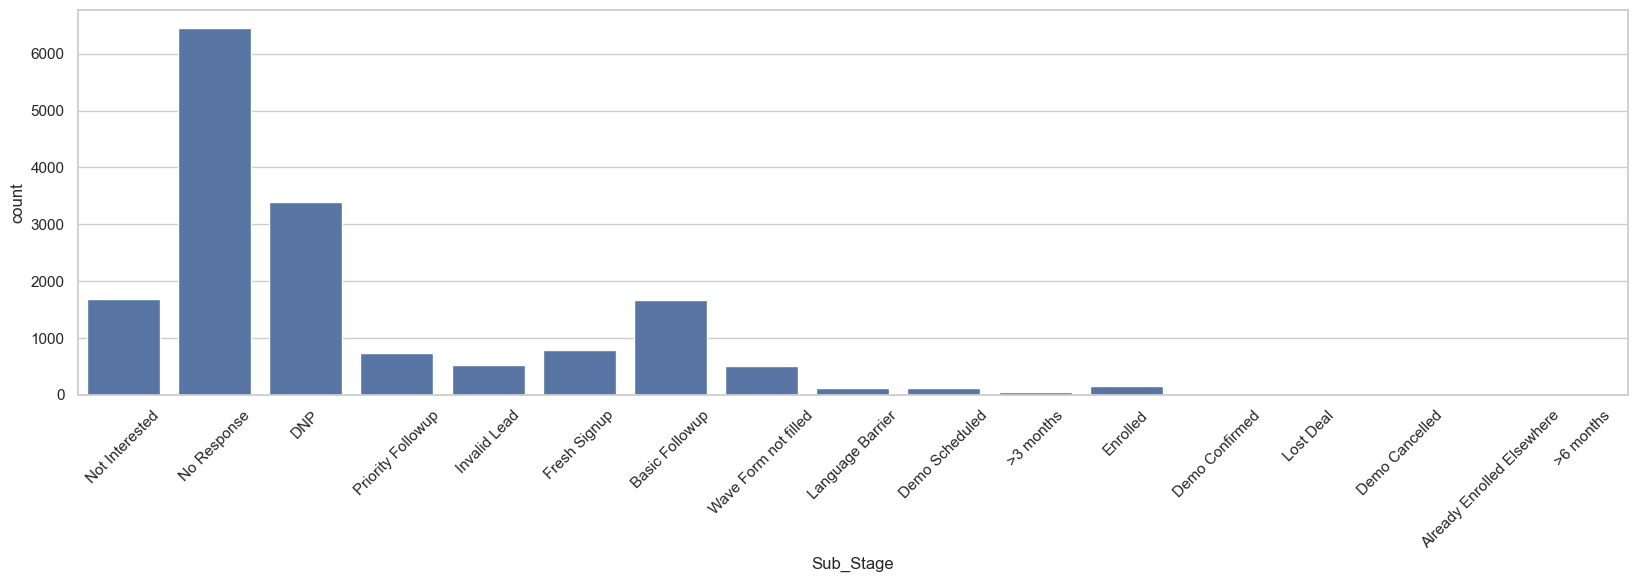

In [311]:
plt.figure(figsize=(20, 5))
sns.countplot(data=non_rev_df, x='Sub_Stage')
plt.xticks(rotation=45)
plt.show()

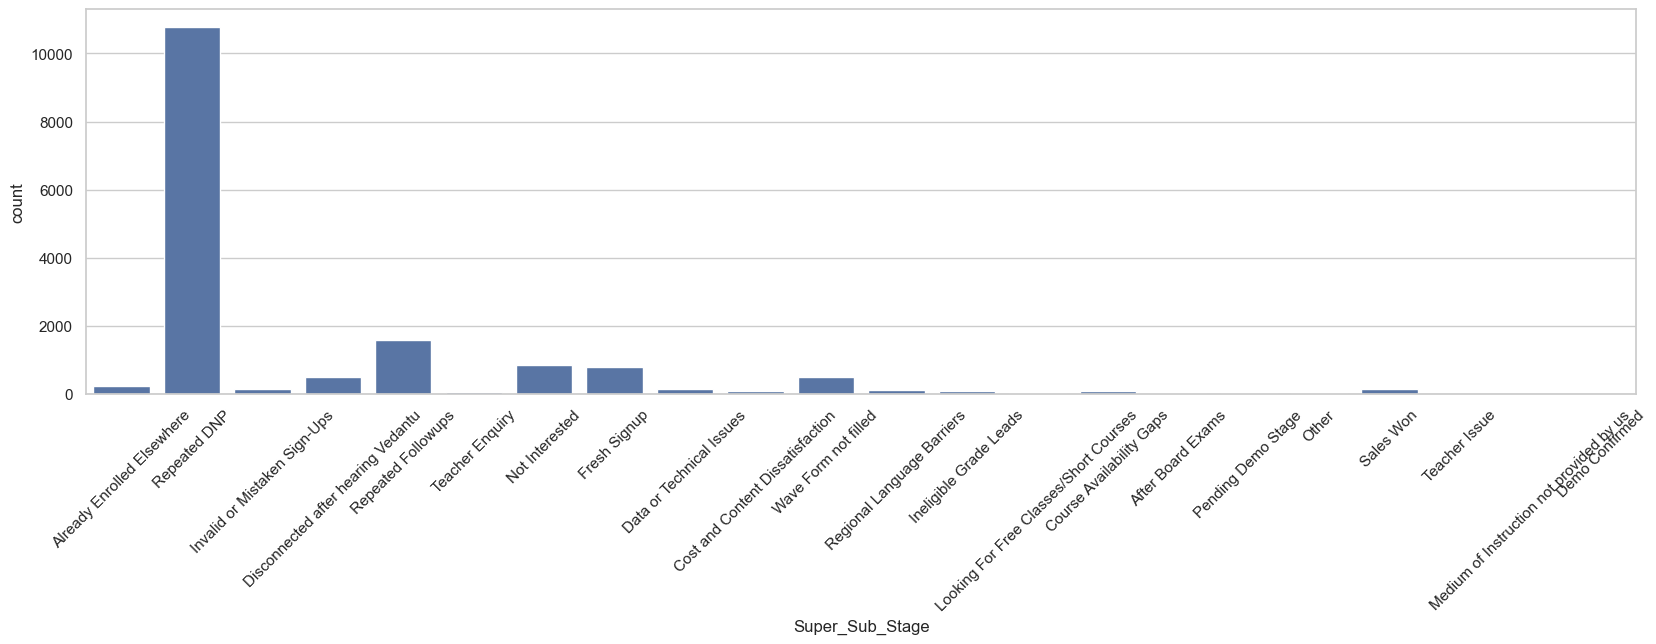

In [312]:
plt.figure(figsize=(20, 5))
sns.countplot(data=non_rev_df, x='Super_Sub_Stage')
plt.xticks(rotation=45)
plt.show()

In [315]:
d5 = non_rev_df[(non_rev_df['Main_Stage'] == 'Enrollment Done') & (non_rev_df['Sub_Stage'] == 'Enrolled') & (non_rev_df['Super_Sub_Stage'] == 'Sales Won')]

In [ ]:
# There are 160 leads, where Main Stage was Enrollment Done, Sub stage was Enrolled, Super Sub Stage was Sales Won but still no revenue, why ?

In [320]:
d5['Talk_Time'].mean().round() # 6 hrs

365.0

In [318]:
d5['First call attempt TAT'].mean().round() # 19 hr

1132.0

In [345]:
d5['First Call Connect_TAT'].mean().round() # 41 hr

2506.0

#### 
Some Non-RG agents spent 6 hours on calls, but their First Call Attempt TAT is 19 hours, and First Call Connect TAT is 41 hours, both higher than RG agents (13 hours and 26 hours). Although these metrics are lower than their cohort’s average, they still need to improve to boost lead conversion.

It’s possible that these Non-RG agents have converted leads and received payments, but the payment data isn’t reflected in the dataset, causing a revenue gap. This discrepancy should be investigated.

In [346]:
print(f"Demo Booking Rate of this Category: {round(d5[d5['Demo_Booked'] == 'Yes']['User ID'].nunique() / d5['User ID'].nunique() * 100)}%")

print(f"Demo Completion Rate of this Category: {round(d5[d5['Demo_Done'] == 'Yes']['User ID'].nunique() / d5['User ID'].nunique() * 100)}%")

Demo Booking Rate of this Category: 38%
Demo Completion Rate of this Category: 36%


In [357]:
d7 = non_rev_df[non_rev_df['Main_Stage'] == 'Lead Connected']
d7.groupby(['Main_Stage', 'Sub_Stage'])['User ID'].count().reset_index(name='Total Counts').sort_values(by='Total Counts', ascending=False)

,Main_Stage,Sub_Stage,Total Counts
5,Lead Connected,Not Interested,1693
1,Lead Connected,Basic Followup,1661
4,Lead Connected,No Response,839
6,Lead Connected,Priority Followup,631
2,Lead Connected,Invalid Lead,517
3,Lead Connected,Language Barrier,115
0,Lead Connected,Already Enrolled Elsewhere,1


In [358]:
d8 = non_rev_df[(non_rev_df['Main_Stage'] == 'Lead Connected') & (non_rev_df['Sub_Stage'] == 'Not Interested')]
d8.groupby(['Main_Stage', 'Sub_Stage', 'Super_Sub_Stage'])['User ID'].count().reset_index(name='Total Counts').sort_values(by='Total Counts', ascending=False)

,Main_Stage,Sub_Stage,Super_Sub_Stage,Total Counts
5,Lead Connected,Not Interested,Not Interested,855
3,Lead Connected,Not Interested,Disconnected after hearing Vedantu,488
0,Lead Connected,Not Interested,Already Enrolled Elsewhere,238
1,Lead Connected,Not Interested,Cost and Content Dissatisfaction,78
4,Lead Connected,Not Interested,Looking For Free Classes/Short Courses,29
2,Lead Connected,Not Interested,Data or Technical Issues,2
7,Lead Connected,Not Interested,Teacher Issue,2
6,Lead Connected,Not Interested,Other,1


In [374]:
d9 = non_rev_df[(non_rev_df['Main_Stage'] == 'Non Contact') & (non_rev_df['Sub_Stage'] == 'No Response')]
d9.groupby(['Main_Stage', 'Sub_Stage', 'Super_Sub_Stage'])['User ID'].count().reset_index(name='Total Counts').sort_values(by='Total Counts', ascending=False)

,Main_Stage,Sub_Stage,Super_Sub_Stage,Total Counts
0,Non Contact,No Response,Repeated DNP,5366


In [378]:
d10 = non_rev_df[non_rev_df['Main_Stage'] == 'Non Contact']

d10.groupby(['Main_Stage', 'Sub_Stage'])['User ID'].count().reset_index(name='Total Counts').sort_values(by='Total Counts', ascending=False)

,Main_Stage,Sub_Stage,Total Counts
2,Non Contact,No Response,5366
0,Non Contact,DNP,3373
1,Non Contact,Invalid Lead,17


# Team Leader Performance

In [384]:
# Total Leads per Team Leader

df.groupby('Team Leader')['User ID'].count().reset_index(name='Total_Leads').sort_values(by='Total_Leads', ascending=False)

,Team Leader,Total_Leads
3,Ansff2506,3276
8,vik9461b9,2978
5,Kis0e4725,2831
0,Abuf0c333,2585
7,Sak519e42,2218
6,S Tfb8a98,1713
4,Bas04b6ce,710
2,Amid12a70,63
1,Ajo81dc3d,9


In [407]:
#Revenue per TL

grouped = df.groupby('Team Leader')['Revenue'].sum().reset_index(name='Total_Revenue')
total_revenue = grouped['Total_Revenue'].sum()
grouped['Percentage'] = (grouped['Total_Revenue'] / total_revenue * 100).round(2)
grouped = grouped.sort_values(by='Total_Revenue', ascending=False)
print(grouped)

  Team Leader  Total_Revenue  Percentage
7   Sak519e42        1715000       38.17
3   Ansff2506         858657       19.11
8   vik9461b9         637600       14.19
0   Abuf0c333         608500       13.54
5   Kis0e4725         310300        6.91
6   S Tfb8a98         183999        4.09
4   Bas04b6ce         179500        3.99
1   Ajo81dc3d              0        0.00
2   Amid12a70              0        0.00


In [393]:
d11 = df[df['Team Leader'].isin(['Ajo81dc3d', 'Amid12a70'])]
d12 = d11[['Team Leader', 'Main_Stage', 'Sub_Stage', 'Super_Sub_Stage', 'User ID', 'Revenue', 'Lead Owner']]

In [397]:
#Rechecking if the above teams are giving the major non-contacts in the main stage
d12.groupby(['Team Leader','Main_Stage'])['User ID'].count()

Team Leader  Main_Stage    
Ajo81dc3d    Assigned           9
Amid12a70    Assigned           3
             Deferred Hot       6
             Demo Booked        2
             Demo Done          1
             Lead Connected    22
             Non Contact       29
Name: User ID, dtype: int64

In [406]:
#Majority of Non-contacts from which team leader's team ?

d13 = non_rev_df.groupby(['Team Leader', 'Main_Stage'])['User ID'].count().reset_index(name='Total Counts')
d13[d13['Main_Stage'] == 'Non Contact']

,Team Leader,Main_Stage,Total Counts
6,Abuf0c333,Non Contact,1368
15,Amid12a70,Non Contact,29
22,Ansff2506,Non Contact,1840
30,Bas04b6ce,Non Contact,327
39,Kis0e4725,Non Contact,1302
47,S Tfb8a98,Non Contact,956
56,Sak519e42,Non Contact,951
65,vik9461b9,Non Contact,1983


# Geographic Analysis

In [408]:
# State-wise Lead Count

df.groupby('State')['User ID'].count().reset_index(name='Leads_Count').sort_values(by='Leads_Count', ascending=False)

,State,Leads_Count
8,Delhi,5522
30,Telangana,1929
12,Himachal Pradesh,1555
34,West Bengal,1171
29,Tamil Nadu,1000
11,Haryana,822
19,Madhya Pradesh,679
4,Bihar,521
27,Rajasthan,429
31,Tripura,402


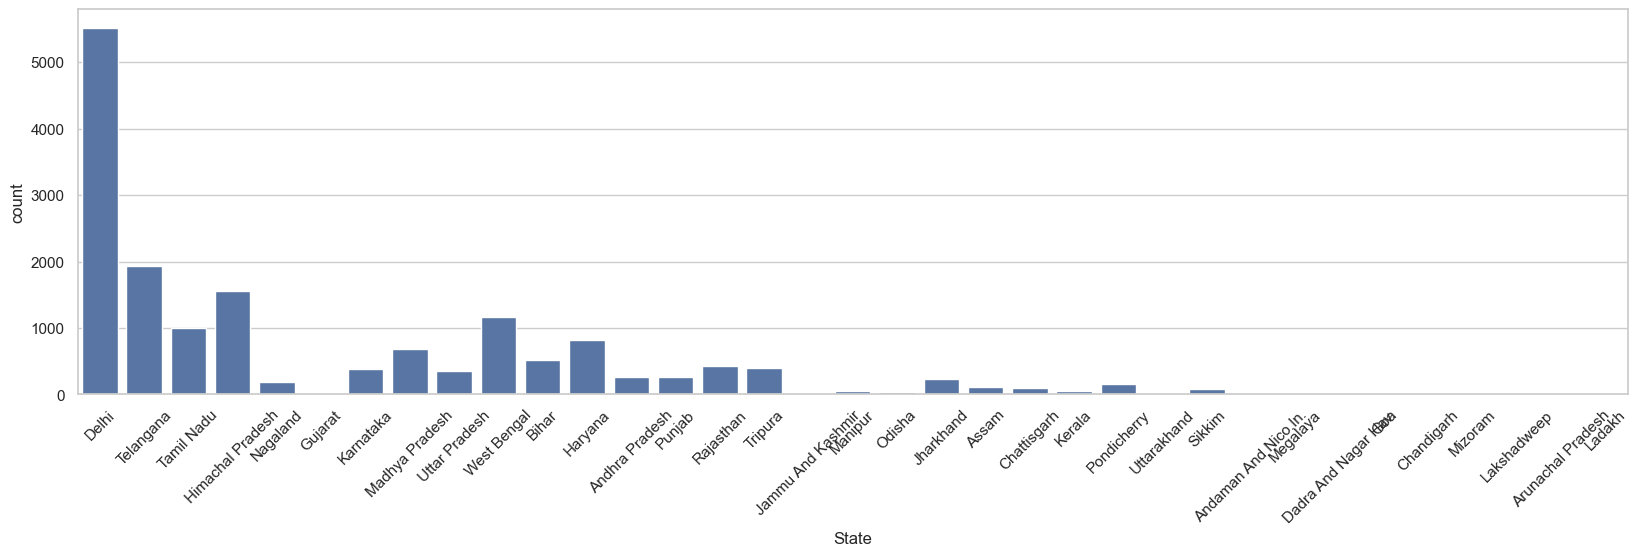

In [411]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x='State')
plt.xticks(rotation=45)
plt.show()

In [414]:
# State-wise Conversion Rate - Demo Booking Conversion Rate

df.groupby('State')['Demo_Booked'].count().reset_index(name='Total Demo').sort_values(by='Total Demo', ascending=False)

,State,Total Demo
8,Delhi,5522
30,Telangana,1929
12,Himachal Pradesh,1555
34,West Bengal,1171
29,Tamil Nadu,1000
11,Haryana,822
19,Madhya Pradesh,679
4,Bihar,521
27,Rajasthan,429
31,Tripura,402


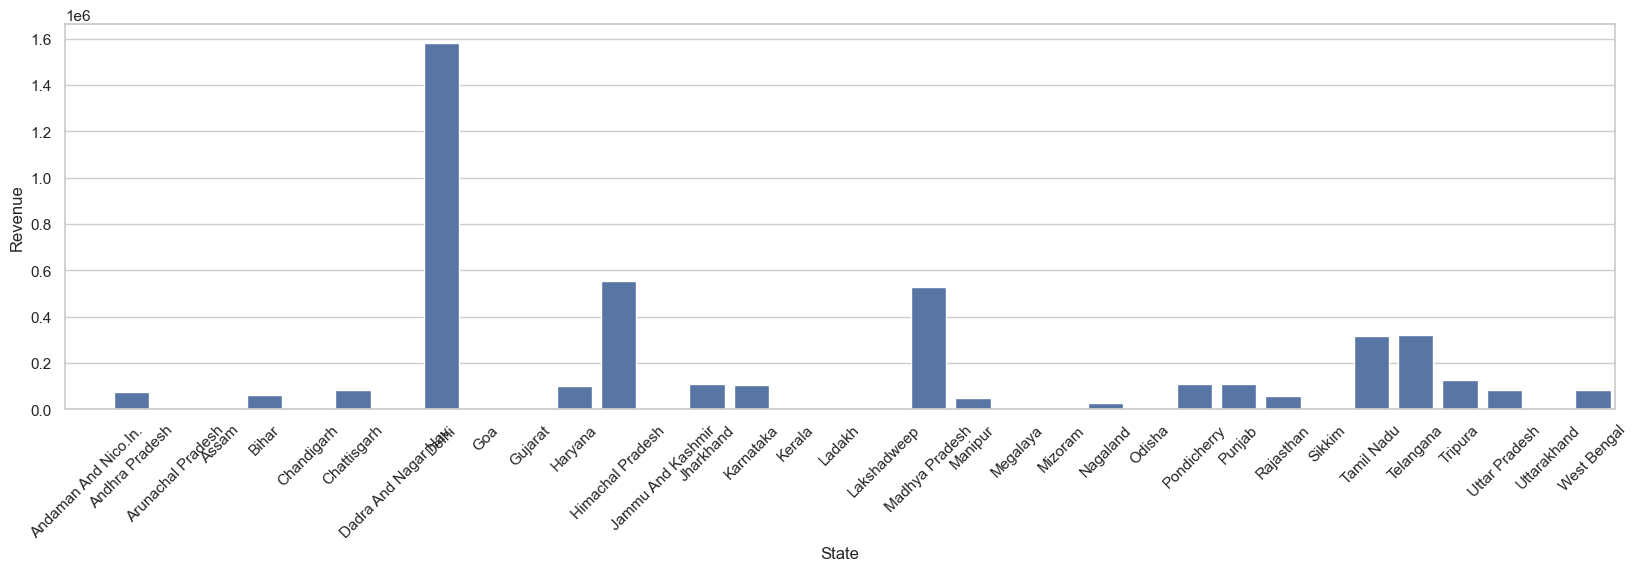

In [422]:
# Aggregate revenue by state
df_state_revenue = df.groupby('State')['Revenue'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(20, 5))
sns.barplot(data=df_state_revenue, x='State', y='Revenue')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Grade', ylabel='count'>

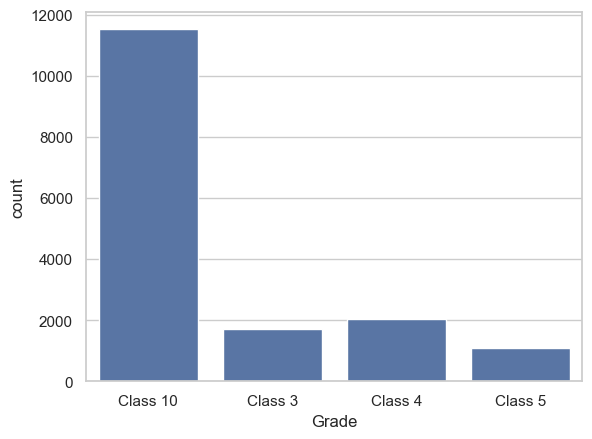

In [424]:
# Revenue by Grade

sns.countplot(x='Grade', data=df)

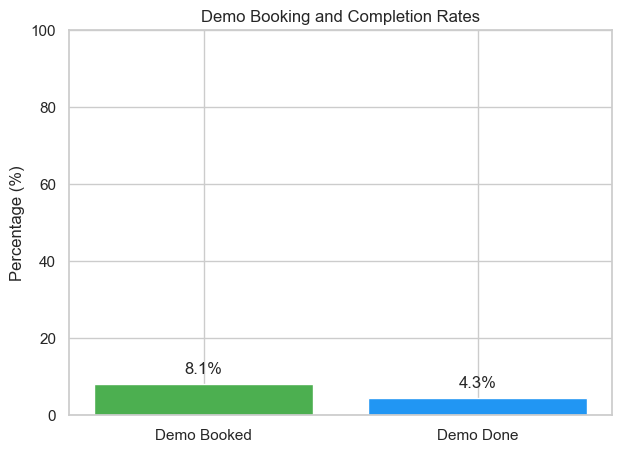

In [442]:
import matplotlib.pyplot as plt

# Define the data for the Demo Booked and Demo Done rates
booked_done_data = [8.06, 4.33]  # Demo Booked Rate, Demo Done Rate
labels = ['Demo Booked', 'Demo Done']

# Create a bar chart
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(labels, booked_done_data, color=['#4CAF50', '#2196F3'])
ax.set_ylabel('Percentage (%)')
ax.set_ylim([0, 100])
plt.title('Demo Booking and Completion Rates')

# Add text to show the exact percentages
for i, v in enumerate(booked_done_data):
    ax.text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom', fontsize=12)

plt.show()
